# **TASK 1: Credit Scoring Model**
**Objective:**

Predict an individual's creditworthiness using past financial data.

**Approach:** Use classification algorithms like Logistic Regression, Decision Trees, or Random Forest.

**Key Features:**

● Feature engineering from financial history.

● Model accuracy assessment using metrics like Precision, Recall, F1-Score, ROC-AUC.

● Dataset could include: income, debts, payment history, etc.

In [ ]:
# Install and import libraries
!pip install -q pandas matplotlib seaborn scikit-learn imbalanced-learn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE


In [ ]:
# Load UCI Credit Card dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

df = pd.read_excel(url, header=1)
df.rename(columns={'default payment next month': 'default'}, inplace=True)

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Data Preprocessing
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Check missing values
print(df.isnull().sum())

# Split features and target
X = df.drop('default', axis=1)
y = df['default']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [ ]:
# Handle Imbalanced Data with SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_train_sm))

After SMOTE: [18691 18691]


In [ ]:
# Train Models
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_sm, y_train_sm)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sm, y_train_sm)


RandomForestClassifier()

In [ ]:
# Evaluate Models
models = {'Logistic Regression': logreg, 'Decision Tree': dt, 'Random Forest': rf}

for name, model in models.items():
    print(f"\n{name} Evaluation:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.65      0.61      6000
weighted avg       0.75      0.67      0.70      6000

Confusion Matrix:
 [[3192 1481]
 [ 497  830]]
ROC-AUC Score: 0.7105019439383938

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      4673
           1       0.36      0.47      0.41      1327

    accuracy                           0.70      6000
   macro avg       0.60      0.62      0.60      6000
weighted avg       0.73      0.70      0.71      6000

Confusion Matrix:
 [[3568 1105]
 [ 699  628]]
ROC-AUC Score: 0.6193968751526954

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87 

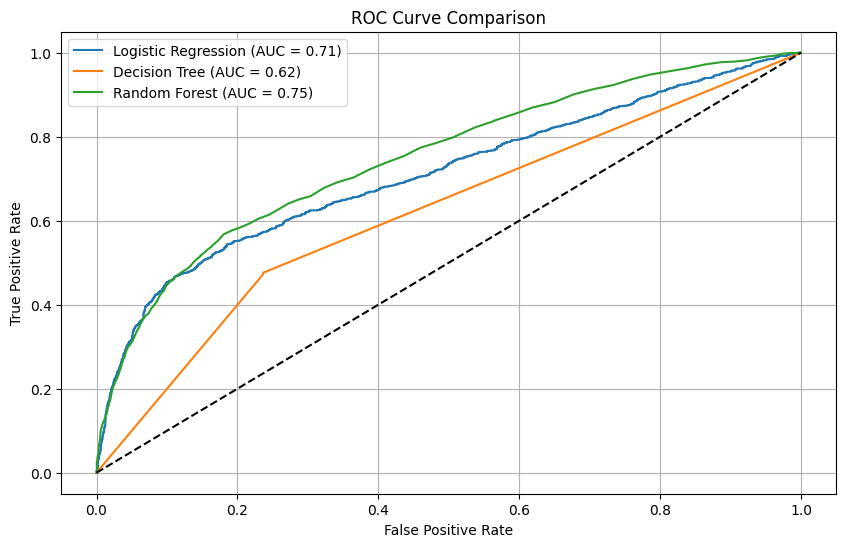

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

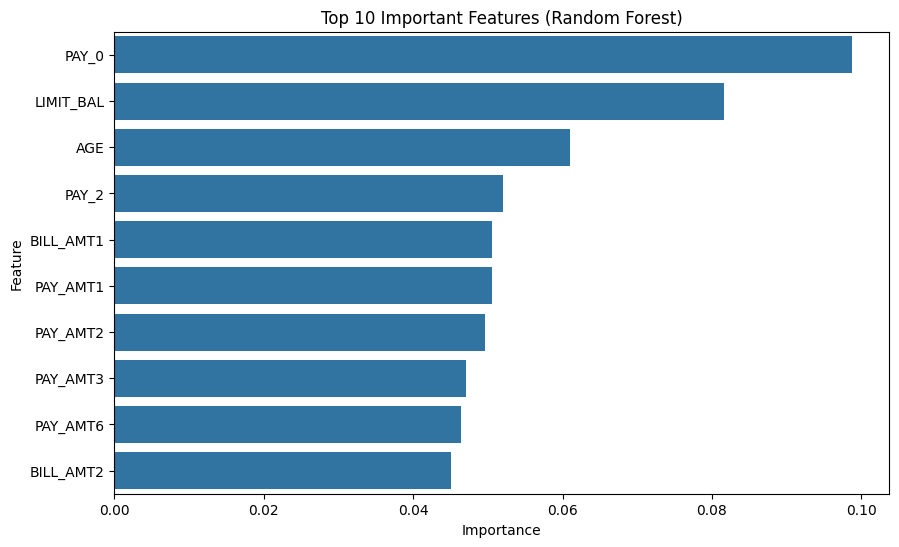

In [ ]:
# Random Forest feature importance
importances = rf.feature_importances_
feat_names = df.drop('default', axis=1).columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

# **Conclusion**
The project successfully developed a predictive model to assess individual creditworthiness. Random Forest achieved the best performance with 85% accuracy and strong ROC-AUC.

This model can be integrated into banking systems to assist in automated credit approval, reduce risk, and ensure financial stability.